![NTNU logo](https://qore.no/res/ntnu-logo-100.png)


# The DL Classifier post processing and reporting tool

###### Author: Aya Saad
###### email: aya.saad@ntnu.no
###### Project: AILARON
###### Contact
###### email: annette.stahl@ntnu.no
###### funded by RCN IKTPLUSS program (project number 262701) and supported by NTNU AMOS
###### Copyright @NTNU 2020
---------------------------------------------------
<!-- -->

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import cmocean
from matplotlib import cm

from matplotlib.ticker import LinearLocator, FormatStrFormatter,PercentFormatter
%matplotlib inline
#%matplotlib notebook
import os
from datetime import datetime, timedelta
## map plots
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.img_tiles as cimgt

# importing library from the SINTEF processing 
# code available at https://github.com/SINTEF/PySilCam
import pysilcam.postprocess as scpp
import pysilcam.plotting as scplt
from pysilcam.config import PySilcamSettings

from scipy import stats as scipystats

# neptus logs library (from Andreas Våge repository)
from dune_proc import * #load_mission_list
from silcam_proc import *
from plotting_tool import *

In [3]:
# -*- coding: utf-8 -*-
local_encoding = 'cp850'  # adapt for other encodings
#AirSaturation.csv, Chlorophyll.csv, Conductivity.csv, DissolvedOxygen.csv, EstimatedState.csv, 
# Pressure.csv, Rpm.csv, Salinity.csv, Temperature.csv, Turbidity.csv, WaterDensity.csv,
# WaterVelocity.csv
## Load data from Neptus
#neptus_dir = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-23/neptus-logs/20200423/"
#neptus_dir = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-23/neptus-logs/merged_logs/"
neptus_dir = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-21/neptus-merged-logs/"
#neptus_dir = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-20/neptusmerged/"
#mission_list = ["092141_munkholmnAdcp", "095628_munkholmenADCP-square",
#               "105605_munkholmenAdcp-square2", "113355_munkholmenAdcp-square3",
#               "124406_roald-test-slow-ascend-goto50", "125419_roald-test-slow-ascend-goto60",
#               "130848_roald-test-slow-ascend-sk60"]
mission_list = [""]
csv_path = "/mra/csv"
#df = load_mission_list(mission_list, neptus_dir, csv_path)
logdir = Path(neptus_dir + csv_path)
df, units = load_neptus_csvs(logdir)
print(df.columns)
    

Index(['AirSaturation', 'Chlorophyll', 'Conductivity', 'DissolvedOxygen',
       'lat', 'lon', 'height', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'u', 'v',
       'w', 'vx', 'vy', 'vz', 'p', 'q', 'r', 'depth', 'alt', 'Pressure', 'Rpm',
       'Salinity', 'Temperature', 'Turbidity', 'WaterDensity', 'wv_x', 'wv_y',
       'wv_z'],
      dtype='object')


In [4]:
datapath = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-23/20200423config.ini"
roidir = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-23/export"
extdir = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-23/ext"
SilCamDataPath = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-23/proc/"
SilCamDataFiles = ["RAW-STATS.csv"]
# location of unprocessed silc files
RAWDIR = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-23/RAW"
RAWBMP = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-23/RAWBMP"
OUTPUTDIR = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-23/proc"
#### April 21st 2020 
datapath = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-21/20200421config.ini"
roidir = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-21/export"
extdir = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-21/ext"
SilCamDataPath = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-21/proc/"
SilCamDataFiles = ["RAW-STATS.csv"]
# location of unprocessed silc files
RAWDIR = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-21/RAW"
RAWBMP = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-21/RAWBMP"
OUTPUTDIR = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-21/proc"


In [5]:



#SilCamDataFile = "F:/resnet_test/proc/RAW-STATS.csv"
#SilCamDataFile2 = "F:/resnet_test/proc02/RAW02-STATS.csv"
#SilCamDataPath = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-23/proc/"
##SilCamDataPath = "F:/resnet_test/proc/"
##SilCamDataFiles = ["RAW-STATS00.csv", "RAW-STATS001.csv"]
#SilCamDataFiles = ["RAW01-STATS.csv","RAW02-STATS.csv","RAW03-STATS.csv"]
##roidir = "F:/resnet_test/export/"
##extdir = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-23/ext"

In [19]:
threshold = 0.95
stat = load_silcam_data(SilCamDataFiles, SilCamDataPath)
#stat = stat.dropna()
stat = make_highest_prob(stat)
print('highest prob ', stat.shape)
stat = extract_middle(stat, [75,348, 1700, 2000])
print('stat.shape after extract middle',stat.shape)
print('stat.head', stat.head(3))
#stat = stat[stat['highest prob'] >= threshold]
#stat = stat[stat['probability_copepod'] == stat['highest prob']]
#stat = stat[stat['probability_faecal_pellets'] >= threshold]
#stat = stat[stat['probability_diatom_chain'] == stat['highest prob']]
stat = stat[stat['probability_other'] >= threshold]
stat_comb = stat_grouped(df=stat)
stat_comb = pd.merge_asof(stat_comb, df, on='timestamp', direction='nearest',
                    tolerance=pd.Timedelta('500ms'))
stat_comb = stat_comb.set_index('timestamp',verify_integrity=True)

print(stat.shape)
print(stat_comb.shape)
print("######## stat_comb ##### ")
stat_comb[['file name', 'partind']] = stat_comb['export name'].str.split('-',expand=True) 
print(stat_comb.columns)
print(stat_comb.head(3))
# stat_comb = stat_comb[(stat_comb['depth']> 1)]
print('stat_comb.shape ',stat_comb.shape)
#silc_to_bmp(stat_comb['file name'].tolist(), RAWDIR, RAWBMP)
#stat_comb.to_csv(SilCamDataPath + '/stat_comb.csv', index = False, header=True)
print(stat_comb['file name'].tolist()[:2])

highest prob  (1231288, 20)
stat.shape after extract middle (514100, 20)
stat.head                                   index  equivalent_diameter  \
timestamp                                                      
2020-04-21 08:37:11.294930+00:00      2            57.069666   
2020-04-21 08:37:11.294930+00:00      3             4.068429   
2020-04-21 08:37:11.294930+00:00      5             9.706685   

                                                  export name  \
timestamp                                                       
2020-04-21 08:37:11.294930+00:00  D20200421T083711.294930-PN2   
2020-04-21 08:37:11.294930+00:00  D20200421T083711.294930-PN3   
2020-04-21 08:37:11.294930+00:00  D20200421T083711.294930-PN5   

                                  major_axis_length    maxc   maxr    minc  \
timestamp                                                                    
2020-04-21 08:37:11.294930+00:00          80.258873  1836.0  249.0  1786.0   
2020-04-21 08:37:11.294930+00:00    

In [20]:
print(stat.shape)
stat = stat.dropna()
print(stat.shape)
print(stat_comb.shape)

df_extract = extract_to_roi(stat, stat_comb, roidir, 
                            extdir, 
                            msize=40, minimgsize=1000)
print(df_extract.shape)
if(df_extract.shape[0] > 0):
    objects_to_file(df_extract, roidir, extdir)
else:
    print('Extracted objects are too small!')

                                                                      

(17819, 20)
(17819, 20)
(7341, 55)
inside export_name2im D20200421T083729.817835-PN8
inside export_name2im D20200421T083744.332512-PN4
inside export_name2im D20200421T083744.582375-PN11
inside export_name2im D20200421T083744.833448-PN20
inside export_name2im D20200421T083745.334067-PN18
inside export_name2im D20200421T083745.833666-PN25
inside export_name2im D20200421T083746.084600-PN18
inside export_name2im D20200421T083746.834786-PN1
inside export_name2im D20200421T083747.335532-PN29
inside export_name2im D20200421T083747.585377-PN18
inside export_name2im D20200421T083747.835843-PN18
inside export_name2im D20200421T083748.085022-PN23
inside export_name2im D20200421T083748.585251-PN3
inside export_name2im D20200421T083748.836226-PN15
inside export_name2im D20200421T083749.085779-PN18
inside export_name2im D20200421T083749.336465-PN2
inside export_name2im D20200421T083749.837512-PN17
inside export_name2im D20200421T083750.087874-PN1
inside export_name2im D20200421T083750.338251-PN49
in

inside export_name2im D20200421T083835.449977-PN16
inside export_name2im D20200421T083835.701256-PN9
inside export_name2im D20200421T083836.206150-PN21
inside export_name2im D20200421T083836.708611-PN22
inside export_name2im D20200421T083836.958601-PN11
inside export_name2im D20200421T083837.208011-PN33
inside export_name2im D20200421T083837.461677-PN33
inside export_name2im D20200421T083837.960558-PN15
inside export_name2im D20200421T083838.209726-PN41
inside export_name2im D20200421T083838.459670-PN6
inside export_name2im D20200421T083838.709685-PN18
inside export_name2im D20200421T083839.462669-PN0
inside export_name2im D20200421T083839.711268-PN6
inside export_name2im D20200421T083839.961866-PN26
inside export_name2im D20200421T083840.213716-PN29
inside export_name2im D20200421T083840.462990-PN16
inside export_name2im D20200421T083840.712075-PN33
inside export_name2im D20200421T083840.964286-PN4
inside export_name2im D20200421T083841.463478-PN2
inside export_name2im D20200421T08384

inside export_name2im D20200421T083926.843282-PN68
inside export_name2im D20200421T083927.346886-PN11
inside export_name2im D20200421T083927.598611-PN22
inside export_name2im D20200421T083927.846910-PN63
inside export_name2im D20200421T083928.096195-PN14
inside export_name2im D20200421T083928.348287-PN30
inside export_name2im D20200421T083928.598797-PN85
inside export_name2im D20200421T083928.850901-PN58
inside export_name2im D20200421T083929.100326-PN43
inside export_name2im D20200421T083929.350953-PN96
inside export_name2im D20200421T083929.602674-PN84
inside export_name2im D20200421T083929.854551-PN16
inside export_name2im D20200421T083930.106205-PN21
inside export_name2im D20200421T083930.358030-PN75
inside export_name2im D20200421T083930.609563-PN20
inside export_name2im D20200421T083931.109442-PN128
inside export_name2im D20200421T083931.359355-PN61
inside export_name2im D20200421T083931.608181-PN30
inside export_name2im D20200421T083931.859031-PN82
inside export_name2im D2020042

inside export_name2im D20200421T084014.969626-PN34
inside export_name2im D20200421T084015.222200-PN48
inside export_name2im D20200421T084015.720112-PN43
inside export_name2im D20200421T084015.973247-PN0
inside export_name2im D20200421T084016.222431-PN26
inside export_name2im D20200421T084016.722050-PN67
inside export_name2im D20200421T084016.972458-PN90
inside export_name2im D20200421T084017.222375-PN51
inside export_name2im D20200421T084018.221164-PN46
inside export_name2im D20200421T084018.473385-PN28
inside export_name2im D20200421T084018.725096-PN78
inside export_name2im D20200421T084018.976324-PN50
inside export_name2im D20200421T084019.225462-PN75
inside export_name2im D20200421T084019.975370-PN31
inside export_name2im D20200421T084020.227719-PN80
inside export_name2im D20200421T084020.479592-PN73
inside export_name2im D20200421T084020.730442-PN60
inside export_name2im D20200421T084021.230672-PN65
inside export_name2im D20200421T084021.480240-PN30
inside export_name2im D20200421T

inside export_name2im D20200421T084740.201749-PN38
inside export_name2im D20200421T084740.703150-PN26
inside export_name2im D20200421T084740.955600-PN43
inside export_name2im D20200421T084741.204163-PN12
inside export_name2im D20200421T084741.455847-PN29
inside export_name2im D20200421T084741.956725-PN28
inside export_name2im D20200421T084742.208299-PN18
inside export_name2im D20200421T084742.457577-PN9
inside export_name2im D20200421T084743.463467-PN35
inside export_name2im D20200421T084744.215448-PN27
inside export_name2im D20200421T084744.467566-PN12
inside export_name2im D20200421T084744.717644-PN17
inside export_name2im D20200421T084745.221434-PN30
inside export_name2im D20200421T084745.472596-PN21
inside export_name2im D20200421T084745.724861-PN24
inside export_name2im D20200421T084745.973883-PN24
inside export_name2im D20200421T084746.222382-PN51
inside export_name2im D20200421T084746.473505-PN5
inside export_name2im D20200421T084747.224418-PN10
inside export_name2im D20200421T0

inside export_name2im D20200421T084833.841999-PN60
inside export_name2im D20200421T084834.093735-PN10
inside export_name2im D20200421T084834.343041-PN9
inside export_name2im D20200421T084836.097782-PN75
inside export_name2im D20200421T084836.346904-PN83
inside export_name2im D20200421T084836.598866-PN36
inside export_name2im D20200421T084836.848936-PN27
inside export_name2im D20200421T084837.100963-PN0
inside export_name2im D20200421T084837.352957-PN2
inside export_name2im D20200421T084837.854459-PN72
inside export_name2im D20200421T084838.355126-PN39
inside export_name2im D20200421T084838.607486-PN24
inside export_name2im D20200421T084838.857963-PN102
inside export_name2im D20200421T084839.107904-PN35
inside export_name2im D20200421T084839.358261-PN46
inside export_name2im D20200421T084839.861289-PN57
inside export_name2im D20200421T084840.112423-PN105
inside export_name2im D20200421T084840.363900-PN75
inside export_name2im D20200421T084840.615834-PN121
inside export_name2im D20200421

inside export_name2im D20200421T084919.958854-PN31
inside export_name2im D20200421T084920.211197-PN36
inside export_name2im D20200421T084920.462142-PN59
inside export_name2im D20200421T084920.710544-PN59
inside export_name2im D20200421T084920.962480-PN34
inside export_name2im D20200421T084921.213083-PN86
inside export_name2im D20200421T084921.464427-PN14
inside export_name2im D20200421T084921.967394-PN39
inside export_name2im D20200421T084922.467371-PN27
inside export_name2im D20200421T084922.716984-PN69
inside export_name2im D20200421T084923.216779-PN69
inside export_name2im D20200421T084923.465549-PN35
inside export_name2im D20200421T084923.716144-PN71
inside export_name2im D20200421T084923.967192-PN24
inside export_name2im D20200421T084924.468613-PN1
inside export_name2im D20200421T084924.720166-PN52
inside export_name2im D20200421T084924.968825-PN27
inside export_name2im D20200421T084925.470195-PN25
inside export_name2im D20200421T084925.722019-PN43
inside export_name2im D20200421T

inside export_name2im D20200421T085400.333740-PN3
inside export_name2im D20200421T085400.583824-PN64
inside export_name2im D20200421T085401.083925-PN10
inside export_name2im D20200421T085401.335260-PN6
inside export_name2im D20200421T085401.586010-PN16
inside export_name2im D20200421T085401.836239-PN60
inside export_name2im D20200421T085402.585394-PN52
inside export_name2im D20200421T085402.836295-PN51
inside export_name2im D20200421T085403.085839-PN39
inside export_name2im D20200421T085403.836424-PN19
inside export_name2im D20200421T085404.086133-PN1
inside export_name2im D20200421T085404.336653-PN18
inside export_name2im D20200421T085404.587418-PN63
inside export_name2im D20200421T085404.837889-PN55
inside export_name2im D20200421T085405.087755-PN0
inside export_name2im D20200421T085405.588435-PN34
inside export_name2im D20200421T085405.838999-PN5
inside export_name2im D20200421T085406.088906-PN20
inside export_name2im D20200421T085406.339659-PN7
inside export_name2im D20200421T08540

inside export_name2im D20200421T085455.971603-PN34
inside export_name2im D20200421T085456.221414-PN24
inside export_name2im D20200421T085456.720191-PN38
inside export_name2im D20200421T085456.972800-PN64
inside export_name2im D20200421T085457.726261-PN61
inside export_name2im D20200421T085457.975608-PN11
inside export_name2im D20200421T085458.226725-PN49
inside export_name2im D20200421T085458.726147-PN38
inside export_name2im D20200421T085458.975252-PN52
inside export_name2im D20200421T085459.226850-PN23
inside export_name2im D20200421T085459.479420-PN24
inside export_name2im D20200421T085459.981901-PN12
inside export_name2im D20200421T085500.230389-PN36
inside export_name2im D20200421T085500.479906-PN35
inside export_name2im D20200421T085500.729280-PN55
inside export_name2im D20200421T085500.981639-PN76
inside export_name2im D20200421T085501.230245-PN52
inside export_name2im D20200421T085501.482380-PN38
inside export_name2im D20200421T085501.985145-PN58
inside export_name2im D20200421

inside export_name2im D20200421T085543.837694-PN51
inside export_name2im D20200421T085544.087852-PN50
inside export_name2im D20200421T085544.837771-PN126
inside export_name2im D20200421T085545.088834-PN58
inside export_name2im D20200421T085545.340903-PN37
inside export_name2im D20200421T085545.591881-PN46
inside export_name2im D20200421T085545.842199-PN43
inside export_name2im D20200421T085546.343771-PN23
inside export_name2im D20200421T085547.346664-PN58
inside export_name2im D20200421T085547.597523-PN0
inside export_name2im D20200421T085547.847755-PN9
inside export_name2im D20200421T085548.098933-PN16
inside export_name2im D20200421T085548.349662-PN29
inside export_name2im D20200421T085548.601391-PN18
inside export_name2im D20200421T085548.851017-PN72
inside export_name2im D20200421T085549.103154-PN9
inside export_name2im D20200421T085549.354609-PN18
inside export_name2im D20200421T085549.605936-PN45
inside export_name2im D20200421T085549.858253-PN38
inside export_name2im D20200421T0

inside export_name2im D20200421T090038.779796-PN19
inside export_name2im D20200421T090039.032719-PN74
inside export_name2im D20200421T090039.285773-PN28
inside export_name2im D20200421T090039.535688-PN43
inside export_name2im D20200421T090039.786994-PN12
inside export_name2im D20200421T090040.038274-PN29
inside export_name2im D20200421T090040.291102-PN22
inside export_name2im D20200421T090040.543102-PN12
inside export_name2im D20200421T090040.794031-PN5
inside export_name2im D20200421T090041.044028-PN46
inside export_name2im D20200421T090041.292276-PN5
inside export_name2im D20200421T090041.541033-PN10
inside export_name2im D20200421T090041.791562-PN0
inside export_name2im D20200421T090042.547459-PN61
inside export_name2im D20200421T090042.796039-PN2
inside export_name2im D20200421T090043.048486-PN97
inside export_name2im D20200421T090043.301497-PN37
inside export_name2im D20200421T090043.551324-PN13
inside export_name2im D20200421T090043.802672-PN41
inside export_name2im D20200421T090

inside export_name2im D20200421T090131.156966-PN20
inside export_name2im D20200421T090131.408365-PN25
inside export_name2im D20200421T090131.661033-PN15
inside export_name2im D20200421T090132.159502-PN12
inside export_name2im D20200421T090132.663284-PN28
inside export_name2im D20200421T090132.911780-PN14
inside export_name2im D20200421T090133.163160-PN31
inside export_name2im D20200421T090133.413996-PN46
inside export_name2im D20200421T090133.915575-PN39
inside export_name2im D20200421T090134.414262-PN43
inside export_name2im D20200421T090134.916436-PN41
inside export_name2im D20200421T090135.166423-PN43
inside export_name2im D20200421T090135.416970-PN26
inside export_name2im D20200421T090135.668342-PN23
inside export_name2im D20200421T090135.917555-PN3
inside export_name2im D20200421T090136.167167-PN13
inside export_name2im D20200421T090136.666427-PN4
inside export_name2im D20200421T090136.919014-PN40
inside export_name2im D20200421T090137.167490-PN23
inside export_name2im D20200421T0

inside export_name2im D20200421T090222.770226-PN42
inside export_name2im D20200421T090223.022481-PN7
inside export_name2im D20200421T090223.272658-PN72
inside export_name2im D20200421T090223.521187-PN127
inside export_name2im D20200421T090223.772656-PN9
inside export_name2im D20200421T090224.025081-PN27
inside export_name2im D20200421T090224.277653-PN9
inside export_name2im D20200421T090224.530111-PN21
inside export_name2im D20200421T090225.032259-PN142
inside export_name2im D20200421T090225.282454-PN69
inside export_name2im D20200421T090225.531603-PN59
inside export_name2im D20200421T090225.781325-PN87
inside export_name2im D20200421T090226.031891-PN97
inside export_name2im D20200421T090226.283403-PN13
inside export_name2im D20200421T090226.534362-PN66
inside export_name2im D20200421T090226.785878-PN114
inside export_name2im D20200421T090227.038031-PN60
inside export_name2im D20200421T090227.289990-PN19
inside export_name2im D20200421T090228.045587-PN4
inside export_name2im D20200421T

inside export_name2im D20200421T091052.411021-PN4
inside export_name2im D20200421T091052.661141-PN25
inside export_name2im D20200421T091053.162219-PN25
inside export_name2im D20200421T091053.412905-PN11
inside export_name2im D20200421T091053.662930-PN26
inside export_name2im D20200421T091053.913823-PN17
inside export_name2im D20200421T091054.164167-PN40
inside export_name2im D20200421T091054.416138-PN46
inside export_name2im D20200421T091054.917657-PN25
inside export_name2im D20200421T091055.167421-PN46
inside export_name2im D20200421T091055.418366-PN23
inside export_name2im D20200421T091055.668479-PN22
inside export_name2im D20200421T091055.919034-PN61
inside export_name2im D20200421T091056.168979-PN41
inside export_name2im D20200421T091056.670104-PN45
inside export_name2im D20200421T091056.921043-PN80
inside export_name2im D20200421T091057.421700-PN82
inside export_name2im D20200421T091057.922663-PN36
inside export_name2im D20200421T091058.171322-PN28
inside export_name2im D20200421T

inside export_name2im D20200421T091150.068160-PN44
inside export_name2im D20200421T091150.317940-PN24
inside export_name2im D20200421T091150.820898-PN60
inside export_name2im D20200421T091151.320363-PN9
inside export_name2im D20200421T091151.570178-PN40
inside export_name2im D20200421T091152.323189-PN13
inside export_name2im D20200421T091152.573597-PN0
inside export_name2im D20200421T091153.577997-PN7
inside export_name2im D20200421T091153.826326-PN42
inside export_name2im D20200421T091154.327606-PN60
inside export_name2im D20200421T091154.576308-PN38
inside export_name2im D20200421T091155.072478-PN3
inside export_name2im D20200421T091155.323933-PN43
inside export_name2im D20200421T091155.572919-PN43
inside export_name2im D20200421T091156.571204-PN7
inside export_name2im D20200421T091156.824008-PN19
inside export_name2im D20200421T091157.076230-PN14
inside export_name2im D20200421T091157.580114-PN30
inside export_name2im D20200421T091157.829892-PN6
inside export_name2im D20200421T09115

inside export_name2im D20200421T091243.133695-PN103
inside export_name2im D20200421T091243.384713-PN2
inside export_name2im D20200421T091243.632565-PN68
inside export_name2im D20200421T091243.886372-PN89
inside export_name2im D20200421T091244.138226-PN37
inside export_name2im D20200421T091244.387702-PN15
inside export_name2im D20200421T091244.638631-PN4
inside export_name2im D20200421T091245.136236-PN29
inside export_name2im D20200421T091245.386538-PN71
inside export_name2im D20200421T091245.635954-PN74
inside export_name2im D20200421T091245.884180-PN66
inside export_name2im D20200421T091246.133308-PN35
inside export_name2im D20200421T091246.383404-PN79
inside export_name2im D20200421T091246.885156-PN83
inside export_name2im D20200421T091247.135498-PN34
inside export_name2im D20200421T091247.388418-PN65
inside export_name2im D20200421T091247.639399-PN82
inside export_name2im D20200421T091247.888500-PN17
inside export_name2im D20200421T091248.138461-PN11
inside export_name2im D20200421T

inside export_name2im D20200421T091640.112928-PN0
inside export_name2im D20200421T091640.364731-PN13
inside export_name2im D20200421T091640.614096-PN31
inside export_name2im D20200421T091640.862885-PN68
inside export_name2im D20200421T091641.361496-PN3
inside export_name2im D20200421T091641.612473-PN91
inside export_name2im D20200421T091642.112166-PN28
inside export_name2im D20200421T091642.364890-PN59
inside export_name2im D20200421T091642.616245-PN23
inside export_name2im D20200421T091642.868318-PN76
inside export_name2im D20200421T091643.116166-PN12
inside export_name2im D20200421T091643.614995-PN41
inside export_name2im D20200421T091644.116912-PN79
inside export_name2im D20200421T091644.366932-PN35
inside export_name2im D20200421T091644.617738-PN64
inside export_name2im D20200421T091644.869040-PN77
inside export_name2im D20200421T091645.370789-PN6
inside export_name2im D20200421T091645.619976-PN51
inside export_name2im D20200421T091645.870203-PN27
inside export_name2im D20200421T09

inside export_name2im D20200421T091732.188785-PN8
inside export_name2im D20200421T091732.438085-PN20
inside export_name2im D20200421T091732.686843-PN30
inside export_name2im D20200421T091732.939680-PN7
inside export_name2im D20200421T091733.189912-PN11
inside export_name2im D20200421T091733.692231-PN25
inside export_name2im D20200421T091734.695219-PN27
inside export_name2im D20200421T091734.946350-PN21
inside export_name2im D20200421T091735.195124-PN10
inside export_name2im D20200421T091735.697701-PN5
inside export_name2im D20200421T091735.946969-PN0
inside export_name2im D20200421T091737.203955-PN11
inside export_name2im D20200421T091737.453582-PN7
inside export_name2im D20200421T091737.704736-PN40
inside export_name2im D20200421T091737.953777-PN13
inside export_name2im D20200421T091738.204448-PN22
inside export_name2im D20200421T091738.456091-PN10
inside export_name2im D20200421T091738.704478-PN17
inside export_name2im D20200421T091738.954106-PN31
inside export_name2im D20200421T0917

inside export_name2im D20200421T091832.155863-PN18
inside export_name2im D20200421T091832.404524-PN10
inside export_name2im D20200421T091832.654153-PN35
inside export_name2im D20200421T091832.904742-PN57
inside export_name2im D20200421T091833.156703-PN69
inside export_name2im D20200421T091833.409077-PN44
inside export_name2im D20200421T091833.658304-PN23
inside export_name2im D20200421T091833.908865-PN41
inside export_name2im D20200421T091834.659559-PN35
inside export_name2im D20200421T091834.912205-PN5
inside export_name2im D20200421T091835.161992-PN83
inside export_name2im D20200421T091835.414725-PN50
inside export_name2im D20200421T091835.664585-PN81
inside export_name2im D20200421T091836.414449-PN54
inside export_name2im D20200421T091836.666977-PN48
inside export_name2im D20200421T091836.919413-PN56
inside export_name2im D20200421T091837.169023-PN31
inside export_name2im D20200421T091837.417736-PN37
inside export_name2im D20200421T091837.669843-PN58
inside export_name2im D20200421T

inside export_name2im D20200421T091920.001779-PN15
inside export_name2im D20200421T091920.251090-PN33
inside export_name2im D20200421T091920.750402-PN24
inside export_name2im D20200421T091921.002625-PN32
inside export_name2im D20200421T091921.254836-PN83
inside export_name2im D20200421T091921.507475-PN40
inside export_name2im D20200421T091922.009940-PN13
inside export_name2im D20200421T091922.514157-PN46
inside export_name2im D20200421T091922.763492-PN63
inside export_name2im D20200421T091923.015443-PN36
inside export_name2im D20200421T091923.266319-PN76
inside export_name2im D20200421T091923.518345-PN52
inside export_name2im D20200421T091923.766634-PN43
inside export_name2im D20200421T091924.266911-PN14
inside export_name2im D20200421T091924.517936-PN35
inside export_name2im D20200421T091924.769426-PN32
inside export_name2im D20200421T091925.022311-PN44
inside export_name2im D20200421T091925.273011-PN12
inside export_name2im D20200421T091925.773331-PN11
inside export_name2im D20200421

inside export_name2im D20200421T092222.378539-PN18
inside export_name2im D20200421T092222.627195-PN66
inside export_name2im D20200421T092222.876111-PN14
inside export_name2im D20200421T092223.124498-PN63
inside export_name2im D20200421T092223.376529-PN28
inside export_name2im D20200421T092223.877196-PN15
inside export_name2im D20200421T092224.127130-PN59
inside export_name2im D20200421T092224.875987-PN31
inside export_name2im D20200421T092225.128096-PN9
inside export_name2im D20200421T092225.377216-PN11
inside export_name2im D20200421T092225.626002-PN24
inside export_name2im D20200421T092225.876443-PN28
inside export_name2im D20200421T092226.129323-PN36
inside export_name2im D20200421T092226.377981-PN25
inside export_name2im D20200421T092226.630318-PN25
inside export_name2im D20200421T092226.880171-PN43
inside export_name2im D20200421T092227.129624-PN36
inside export_name2im D20200421T092227.377994-PN5
inside export_name2im D20200421T092227.629884-PN9
inside export_name2im D20200421T09

C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-21/ext\D20200421T092240.409844-PN7.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20200421T092240.659372-PN29
inside export_name2im D20200421T092240.908785-PN25
inside export_name2im D20200421T092241.161591-PN49
inside export_name2im D20200421T092241.412931-PN33
inside export_name2im D20200421T092242.162976-PN13
inside export_name2im D20200421T092242.413446-PN29
inside export_name2im D20200421T092242.915754-PN42
inside export_name2im D20200421T092243.163840-PN55
inside export_name2im D20200421T092243.413986-PN3
inside export_name2im D20200421T092243.662206-PN12
inside export_name2im D20200421T092244.411762-PN20
inside export_name2im D20200421T092244.664386-PN15
inside export_name2im D20200421T092245.167459-PN41
inside export_name2im D20200421T092245.921091-PN41
inside export_name2im D20200421T092246.423084-PN18
inside export_name2im D20200421T092246.673665-PN16
inside export_name2im D20200421T092247.178050-PN9
inside export_name2im D20200421T092247.426688-PN4
inside export_name2im D20200421T092247.678846-PN3
inside export_name2im D20200421T092

inside export_name2im D20200421T092337.827877-PN30
inside export_name2im D20200421T092338.576935-PN56
inside export_name2im D20200421T092339.076809-PN10
inside export_name2im D20200421T092339.327367-PN54
inside export_name2im D20200421T092340.327538-PN19
inside export_name2im D20200421T092340.576676-PN13
inside export_name2im D20200421T092341.327907-PN22
inside export_name2im D20200421T092342.084921-PN17
inside export_name2im D20200421T092342.844361-PN63
inside export_name2im D20200421T092345.262276-PN48
inside export_name2im D20200421T092345.510903-PN51
inside export_name2im D20200421T092345.760970-PN64
inside export_name2im D20200421T092346.260975-PN54
inside export_name2im D20200421T092346.762970-PN8
inside export_name2im D20200421T092347.014378-PN28
inside export_name2im D20200421T092347.264834-PN83
inside export_name2im D20200421T092347.401175-PN17
inside export_name2im D20200421T092349.020202-PN5
inside export_name2im D20200421T092349.523211-PN20
inside export_name2im D20200421T0

inside export_name2im D20200421T092428.613189-PN36
inside export_name2im D20200421T092428.863953-PN39
inside export_name2im D20200421T092429.114074-PN98
inside export_name2im D20200421T092429.613275-PN128
inside export_name2im D20200421T092429.864025-PN80
inside export_name2im D20200421T092430.113943-PN21
inside export_name2im D20200421T092430.364194-PN55
inside export_name2im D20200421T092430.616152-PN69
inside export_name2im D20200421T092430.866347-PN49
inside export_name2im D20200421T092431.114426-PN37
inside export_name2im D20200421T092431.366073-PN67
inside export_name2im D20200421T092431.615885-PN83
inside export_name2im D20200421T092431.864706-PN28
inside export_name2im D20200421T092432.116856-PN81
inside export_name2im D20200421T092432.367693-PN69
inside export_name2im D20200421T092432.617100-PN20
inside export_name2im D20200421T092432.866008-PN41
inside export_name2im D20200421T092433.114381-PN42
inside export_name2im D20200421T092433.364983-PN53
inside export_name2im D2020042

inside export_name2im D20200421T092722.510326-PN6
inside export_name2im D20200421T092722.759463-PN40
inside export_name2im D20200421T092723.011332-PN37
inside export_name2im D20200421T092723.263414-PN22
inside export_name2im D20200421T092723.514762-PN103
inside export_name2im D20200421T092723.766892-PN3
inside export_name2im D20200421T092724.016329-PN37
inside export_name2im D20200421T092724.267006-PN28
inside export_name2im D20200421T092724.518000-PN51
inside export_name2im D20200421T092724.770426-PN104
inside export_name2im D20200421T092725.022716-PN73
inside export_name2im D20200421T092725.271376-PN3
inside export_name2im D20200421T092725.523974-PN14
inside export_name2im D20200421T092725.774031-PN7
inside export_name2im D20200421T092726.274936-PN88
inside export_name2im D20200421T092726.525350-PN12
inside export_name2im D20200421T092726.777170-PN22
inside export_name2im D20200421T092727.029532-PN35
inside export_name2im D20200421T092727.278570-PN55
inside export_name2im D20200421T0

inside export_name2im D20200421T092816.104988-PN8
inside export_name2im D20200421T092816.353122-PN13
inside export_name2im D20200421T092816.603564-PN39
inside export_name2im D20200421T092816.854955-PN23
inside export_name2im D20200421T092817.103700-PN21
inside export_name2im D20200421T092817.354110-PN5
inside export_name2im D20200421T092817.602671-PN5
inside export_name2im D20200421T092817.853912-PN36
inside export_name2im D20200421T092818.106132-PN49
inside export_name2im D20200421T092818.357397-PN36
inside export_name2im D20200421T092818.607319-PN1
inside export_name2im D20200421T092818.859635-PN20
inside export_name2im D20200421T092819.360640-PN44
inside export_name2im D20200421T092819.610819-PN10
inside export_name2im D20200421T092819.861362-PN33
inside export_name2im D20200421T092820.611964-PN16
inside export_name2im D20200421T092820.863601-PN20
inside export_name2im D20200421T092821.364877-PN9
inside export_name2im D20200421T092821.614469-PN15
inside export_name2im D20200421T0928

inside export_name2im D20200421T092912.835379-PN56
inside export_name2im D20200421T092913.086944-PN11
inside export_name2im D20200421T092913.587226-PN20
inside export_name2im D20200421T092913.836456-PN1
inside export_name2im D20200421T092914.088446-PN36
inside export_name2im D20200421T092914.340333-PN36
inside export_name2im D20200421T092914.592853-PN114
inside export_name2im D20200421T092914.841119-PN26
inside export_name2im D20200421T092915.089969-PN137
inside export_name2im D20200421T092915.342217-PN6
inside export_name2im D20200421T092915.846943-PN115
inside export_name2im D20200421T092916.096266-PN22
inside export_name2im D20200421T092916.596427-PN59
inside export_name2im D20200421T092916.847928-PN87
inside export_name2im D20200421T092917.097289-PN115
inside export_name2im D20200421T092917.349346-PN60
inside export_name2im D20200421T092917.599497-PN39
inside export_name2im D20200421T092917.847994-PN137
inside export_name2im D20200421T092918.097541-PN79
inside export_name2im D20200

inside export_name2im D20200421T093200.021440-PN6
inside export_name2im D20200421T093200.271919-PN2
inside export_name2im D20200421T093200.523792-PN2
inside export_name2im D20200421T093200.773148-PN5
inside export_name2im D20200421T093201.022501-PN41
inside export_name2im D20200421T093202.521994-PN18
inside export_name2im D20200421T093202.772304-PN9
inside export_name2im D20200421T093203.021935-PN40
inside export_name2im D20200421T093204.521822-PN4
inside export_name2im D20200421T093204.770676-PN15
inside export_name2im D20200421T093205.020194-PN8
inside export_name2im D20200421T093205.520162-PN3
inside export_name2im D20200421T093205.769423-PN13
inside export_name2im D20200421T093206.773814-PN58
inside export_name2im D20200421T093207.274588-PN40
inside export_name2im D20200421T093207.526356-PN8
inside export_name2im D20200421T093208.276566-PN30
inside export_name2im D20200421T093208.526109-PN29
inside export_name2im D20200421T093208.774746-PN32
inside export_name2im D20200421T093209.0

inside export_name2im D20200421T093253.873954-PN25
inside export_name2im D20200421T093254.123173-PN18
inside export_name2im D20200421T093254.374505-PN4
inside export_name2im D20200421T093254.627647-PN5
inside export_name2im D20200421T093254.879364-PN22
inside export_name2im D20200421T093255.128512-PN25
inside export_name2im D20200421T093256.124912-PN38
inside export_name2im D20200421T093256.373842-PN9
inside export_name2im D20200421T093256.873973-PN14
inside export_name2im D20200421T093257.373937-PN15
inside export_name2im D20200421T093258.376721-PN5
inside export_name2im D20200421T093258.626536-PN23
inside export_name2im D20200421T093258.876672-PN26
inside export_name2im D20200421T093259.126675-PN26
inside export_name2im D20200421T093259.375974-PN17
inside export_name2im D20200421T093259.628308-PN38
inside export_name2im D20200421T093259.876432-PN3
inside export_name2im D20200421T093300.631679-PN32
inside export_name2im D20200421T093300.880131-PN21
inside export_name2im D20200421T0933

inside export_name2im D20200421T093358.252572-PN54
inside export_name2im D20200421T093358.503166-PN81
inside export_name2im D20200421T093358.751775-PN1
inside export_name2im D20200421T093359.255685-PN58
inside export_name2im D20200421T093400.255334-PN100
inside export_name2im D20200421T093400.507931-PN72
inside export_name2im D20200421T093400.757516-PN77
inside export_name2im D20200421T093401.008839-PN78
inside export_name2im D20200421T093401.261144-PN37
inside export_name2im D20200421T093401.760137-PN87
inside export_name2im D20200421T093402.260242-PN63
inside export_name2im D20200421T093402.511122-PN95
inside export_name2im D20200421T093403.261378-PN3
inside export_name2im D20200421T093403.512344-PN39
inside export_name2im D20200421T093403.762638-PN75
inside export_name2im D20200421T093404.014295-PN49
inside export_name2im D20200421T093404.266292-PN28
inside export_name2im D20200421T093404.516827-PN95
inside export_name2im D20200421T093404.766264-PN5
inside export_name2im D20200421T0

inside export_name2im D20200421T093713.959625-PN51
inside export_name2im D20200421T093714.208589-PN28
inside export_name2im D20200421T093714.458790-PN46
inside export_name2im D20200421T093715.458894-PN8
inside export_name2im D20200421T093715.707482-PN23
inside export_name2im D20200421T093716.206600-PN24
inside export_name2im D20200421T093716.457918-PN10
inside export_name2im D20200421T093716.708234-PN29
inside export_name2im D20200421T093716.957278-PN29
inside export_name2im D20200421T093717.206220-PN7
inside export_name2im D20200421T093717.455906-PN21
inside export_name2im D20200421T093718.203053-PN8
inside export_name2im D20200421T093718.451428-PN29
inside export_name2im D20200421T093719.700561-PN57
inside export_name2im D20200421T093719.950673-PN10
inside export_name2im D20200421T093720.202842-PN56
inside export_name2im D20200421T093720.701017-PN35
inside export_name2im D20200421T093720.949994-PN46
inside export_name2im D20200421T093721.198586-PN45
inside export_name2im D20200421T09

inside export_name2im D20200421T093805.817906-PN31
inside export_name2im D20200421T093806.319743-PN11
inside export_name2im D20200421T093806.568508-PN8
inside export_name2im D20200421T093806.820542-PN28
inside export_name2im D20200421T093807.069816-PN36
inside export_name2im D20200421T093807.320408-PN16
inside export_name2im D20200421T093807.570217-PN4
inside export_name2im D20200421T093807.821468-PN32
inside export_name2im D20200421T093808.071798-PN25
inside export_name2im D20200421T093808.321773-PN13
inside export_name2im D20200421T093808.571476-PN10
inside export_name2im D20200421T093808.822715-PN15
inside export_name2im D20200421T093809.073830-PN4
inside export_name2im D20200421T093809.326646-PN11
inside export_name2im D20200421T093809.578126-PN23
inside export_name2im D20200421T093809.826793-PN26
inside export_name2im D20200421T093810.329189-PN19
inside export_name2im D20200421T093810.577227-PN9
inside export_name2im D20200421T093810.829741-PN19
inside export_name2im D20200421T093

inside export_name2im D20200421T093911.638519-PN22
inside export_name2im D20200421T093912.139554-PN22
inside export_name2im D20200421T093912.388399-PN34
inside export_name2im D20200421T093912.640185-PN4
inside export_name2im D20200421T093912.891129-PN83
inside export_name2im D20200421T093913.139248-PN72
inside export_name2im D20200421T093913.388335-PN5
inside export_name2im D20200421T093913.639626-PN40
inside export_name2im D20200421T093913.890048-PN55
inside export_name2im D20200421T093916.004856-PN38
inside export_name2im D20200421T093918.538962-PN47
inside export_name2im D20200421T093919.004165-PN74
inside export_name2im D20200421T093919.503419-PN43
inside export_name2im D20200421T093919.752699-PN7
inside export_name2im D20200421T093920.003327-PN86
inside export_name2im D20200421T093920.255187-PN23
inside export_name2im D20200421T093920.755188-PN36
inside export_name2im D20200421T093921.257061-PN63
inside export_name2im D20200421T093921.509026-PN72
inside export_name2im D20200421T09

inside export_name2im D20200421T094555.879263-PN3
inside export_name2im D20200421T094556.128332-PN26
inside export_name2im D20200421T094556.380310-PN74
inside export_name2im D20200421T094556.880422-PN52
inside export_name2im D20200421T094557.632716-PN35
inside export_name2im D20200421T094557.883593-PN9
inside export_name2im D20200421T094558.135719-PN8
inside export_name2im D20200421T094558.387067-PN6
inside export_name2im D20200421T094558.638980-PN42
inside export_name2im D20200421T094558.890590-PN30
inside export_name2im D20200421T094559.142466-PN5
inside export_name2im D20200421T094559.393973-PN9
inside export_name2im D20200421T094559.645858-PN8
inside export_name2im D20200421T094600.145852-PN9
inside export_name2im D20200421T094600.649862-PN49
inside export_name2im D20200421T094601.151313-PN9
inside export_name2im D20200421T094601.651589-PN0
inside export_name2im D20200421T094601.903233-PN2
inside export_name2im D20200421T094602.153519-PN30
inside export_name2im D20200421T094602.405

inside export_name2im D20200421T094645.719607-PN25
inside export_name2im D20200421T094645.970908-PN21
inside export_name2im D20200421T094646.219633-PN3
inside export_name2im D20200421T094646.468606-PN6
inside export_name2im D20200421T094646.718951-PN3
inside export_name2im D20200421T094646.967908-PN42
inside export_name2im D20200421T094647.218587-PN3
inside export_name2im D20200421T094647.467947-PN2
inside export_name2im D20200421T094647.717025-PN3
inside export_name2im D20200421T094647.965761-PN16
inside export_name2im D20200421T094648.215606-PN8
inside export_name2im D20200421T094648.465344-PN8
inside export_name2im D20200421T094648.713800-PN10
inside export_name2im D20200421T094648.959941-PN33
inside export_name2im D20200421T094649.214052-PN6
inside export_name2im D20200421T094649.466024-PN39
inside export_name2im D20200421T094649.718042-PN39
inside export_name2im D20200421T094650.218179-PN18
inside export_name2im D20200421T094650.466490-PN23
inside export_name2im D20200421T094650.9

inside export_name2im D20200421T094742.833397-PN65
inside export_name2im D20200421T094743.831515-PN49
inside export_name2im D20200421T094744.583876-PN42
inside export_name2im D20200421T094745.084808-PN69
inside export_name2im D20200421T094745.333274-PN22
inside export_name2im D20200421T094745.585660-PN8
inside export_name2im D20200421T094745.836036-PN51
inside export_name2im D20200421T094746.335448-PN20
inside export_name2im D20200421T094746.834496-PN72
inside export_name2im D20200421T094747.336921-PN84
inside export_name2im D20200421T094747.838688-PN71
inside export_name2im D20200421T094748.342388-PN2
inside export_name2im D20200421T094748.591223-PN59
inside export_name2im D20200421T094748.838862-PN17
inside export_name2im D20200421T094749.089888-PN68
inside export_name2im D20200421T094749.337914-PN35
inside export_name2im D20200421T094749.586597-PN46
inside export_name2im D20200421T094749.839267-PN94
inside export_name2im D20200421T094750.087696-PN14
inside export_name2im D20200421T0

inside export_name2im D20200421T094833.168807-PN80
inside export_name2im D20200421T094833.669465-PN74
inside export_name2im D20200421T094834.420642-PN103
inside export_name2im D20200421T094834.669908-PN62
inside export_name2im D20200421T094919.717391-PN44
inside export_name2im D20200421T094943.270106-PN44
inside export_name2im D20200421T095024.360901-PN88
inside export_name2im D20200421T095050.916257-PN7
inside export_name2im D20200421T095113.217643-PN28
inside export_name2im D20200421T095113.715480-PN52
inside export_name2im D20200421T095113.965454-PN31
inside export_name2im D20200421T095114.720160-PN29
inside export_name2im D20200421T095115.223686-PN8
inside export_name2im D20200421T095115.721627-PN30
inside export_name2im D20200421T095115.973960-PN12
inside export_name2im D20200421T095116.475020-PN6
inside export_name2im D20200421T095116.977909-PN59
inside export_name2im D20200421T095117.230145-PN60
inside export_name2im D20200421T095117.734054-PN50
inside export_name2im D20200421T0

inside export_name2im D20200421T095159.044394-PN23
inside export_name2im D20200421T095159.295459-PN28
inside export_name2im D20200421T095159.544221-PN38
inside export_name2im D20200421T095200.044201-PN5
inside export_name2im D20200421T095200.293032-PN32
inside export_name2im D20200421T095200.794856-PN6
inside export_name2im D20200421T095201.295367-PN1
inside export_name2im D20200421T095201.543956-PN9
inside export_name2im D20200421T095202.047321-PN16
inside export_name2im D20200421T095202.296127-PN2
inside export_name2im D20200421T095202.546987-PN52
inside export_name2im D20200421T095203.046205-PN5
inside export_name2im D20200421T095203.297289-PN11
inside export_name2im D20200421T095203.547964-PN18
inside export_name2im D20200421T095203.796946-PN15
inside export_name2im D20200421T095204.046539-PN23
inside export_name2im D20200421T095204.297152-PN2
inside export_name2im D20200421T095204.545963-PN8
inside export_name2im D20200421T095204.796997-PN8
inside export_name2im D20200421T095205.0

inside export_name2im D20200421T095816.517090-PN47
inside export_name2im D20200421T095816.768326-PN79
inside export_name2im D20200421T095817.017689-PN46
inside export_name2im D20200421T095817.266436-PN6
inside export_name2im D20200421T095817.515020-PN81
inside export_name2im D20200421T095817.767089-PN17
inside export_name2im D20200421T095818.015981-PN77
inside export_name2im D20200421T095818.268284-PN23
inside export_name2im D20200421T095818.517152-PN95
inside export_name2im D20200421T095818.768433-PN3
inside export_name2im D20200421T095819.020675-PN50
inside export_name2im D20200421T095819.273126-PN74
inside export_name2im D20200421T095819.521948-PN1
inside export_name2im D20200421T095819.774485-PN54
inside export_name2im D20200421T095820.022471-PN2
inside export_name2im D20200421T095820.523627-PN29
inside export_name2im D20200421T095820.774658-PN42
inside export_name2im D20200421T095821.272459-PN20
inside export_name2im D20200421T095821.770168-PN7
inside export_name2im D20200421T0958

inside export_name2im D20200421T095907.327786-PN51
inside export_name2im D20200421T095907.578135-PN29
inside export_name2im D20200421T095907.830473-PN22
inside export_name2im D20200421T095908.081605-PN3
inside export_name2im D20200421T095908.581097-PN33
inside export_name2im D20200421T095908.831312-PN4
inside export_name2im D20200421T095909.082122-PN23
inside export_name2im D20200421T095909.333202-PN1
inside export_name2im D20200421T095909.583363-PN17
inside export_name2im D20200421T095909.833481-PN31
inside export_name2im D20200421T095910.586004-PN32
inside export_name2im D20200421T095910.837305-PN8
inside export_name2im D20200421T095911.089316-PN16
inside export_name2im D20200421T095911.338805-PN34
inside export_name2im D20200421T095911.587525-PN38
inside export_name2im D20200421T095911.835827-PN37
inside export_name2im D20200421T095912.334979-PN11
inside export_name2im D20200421T095912.833888-PN26
inside export_name2im D20200421T095913.333954-PN38
inside export_name2im D20200421T095

inside export_name2im D20200421T100004.012506-PN26
inside export_name2im D20200421T100004.262171-PN87
inside export_name2im D20200421T100004.513648-PN19
inside export_name2im D20200421T100004.765255-PN59
inside export_name2im D20200421T100005.017301-PN33
inside export_name2im D20200421T100005.269629-PN67
inside export_name2im D20200421T100005.518520-PN44
inside export_name2im D20200421T100005.766519-PN56
inside export_name2im D20200421T100006.017669-PN42
inside export_name2im D20200421T100006.270012-PN61
inside export_name2im D20200421T100006.518651-PN91
inside export_name2im D20200421T100006.767562-PN56
inside export_name2im D20200421T100007.268786-PN21
inside export_name2im D20200421T100007.517302-PN40
inside export_name2im D20200421T100007.766564-PN29
inside export_name2im D20200421T100008.015043-PN101
inside export_name2im D20200421T100008.263594-PN61
inside export_name2im D20200421T100008.512821-PN88
inside export_name2im D20200421T100008.762216-PN19
inside export_name2im D2020042

inside export_name2im D20200421T100051.295418-PN0
inside export_name2im D20200421T100051.547167-PN6
inside export_name2im D20200421T100053.295541-PN12
inside export_name2im D20200421T100057.050227-PN0
inside export_name2im D20200421T100316.668707-PN13
inside export_name2im D20200421T100319.176477-PN25
inside export_name2im D20200421T100319.925627-PN96
inside export_name2im D20200421T100320.427261-PN62
inside export_name2im D20200421T100320.678354-PN59
inside export_name2im D20200421T100320.928494-PN0
inside export_name2im D20200421T100321.180694-PN30
inside export_name2im D20200421T100321.430982-PN24
inside export_name2im D20200421T100321.681690-PN42
inside export_name2im D20200421T100322.085825-PN47
inside export_name2im D20200421T100322.310126-PN22
inside export_name2im D20200421T100322.562208-PN99
inside export_name2im D20200421T100322.813559-PN30
inside export_name2im D20200421T100323.064987-PN62
inside export_name2im D20200421T100323.316166-PN65
inside export_name2im D20200421T100

inside export_name2im D20200421T100409.361875-PN1
inside export_name2im D20200421T100409.610506-PN11
inside export_name2im D20200421T100409.859849-PN27
inside export_name2im D20200421T100410.108119-PN10
inside export_name2im D20200421T100410.360468-PN8
inside export_name2im D20200421T100410.608648-PN18
inside export_name2im D20200421T100410.860244-PN24
inside export_name2im D20200421T100411.110692-PN38
inside export_name2im D20200421T100411.360221-PN29
inside export_name2im D20200421T100411.612359-PN13
inside export_name2im D20200421T100411.863910-PN2
inside export_name2im D20200421T100412.114461-PN19
inside export_name2im D20200421T100412.611665-PN15
inside export_name2im D20200421T100412.863120-PN6
inside export_name2im D20200421T100413.111690-PN1
inside export_name2im D20200421T100413.363021-PN5
inside export_name2im D20200421T100413.613271-PN30
inside export_name2im D20200421T100413.865288-PN14
inside export_name2im D20200421T100414.116068-PN23
inside export_name2im D20200421T10041

inside export_name2im D20200421T102005.091943-PN44
inside export_name2im D20200421T102005.343725-PN61
inside export_name2im D20200421T102005.593263-PN22
inside export_name2im D20200421T102005.841255-PN38
inside export_name2im D20200421T102006.089872-PN7
inside export_name2im D20200421T102006.341210-PN47
inside export_name2im D20200421T102006.592923-PN9
inside export_name2im D20200421T102006.844051-PN46
inside export_name2im D20200421T102007.095858-PN57
inside export_name2im D20200421T102007.347646-PN27
inside export_name2im D20200421T102007.596380-PN49
inside export_name2im D20200421T102007.847715-PN8
inside export_name2im D20200421T102008.096325-PN18
inside export_name2im D20200421T102008.348166-PN12
inside export_name2im D20200421T102008.600151-PN61
inside export_name2im D20200421T102008.851787-PN68
inside export_name2im D20200421T102009.100013-PN31
inside export_name2im D20200421T102009.601784-PN27
inside export_name2im D20200421T102009.853115-PN30
inside export_name2im D20200421T10

inside export_name2im D20200421T102052.607815-PN19
inside export_name2im D20200421T102052.857974-PN7
inside export_name2im D20200421T102053.359265-PN13
inside export_name2im D20200421T102053.611377-PN7
inside export_name2im D20200421T102053.862999-PN37
inside export_name2im D20200421T102054.423404-PN16
inside export_name2im D20200421T102054.672030-PN50
inside export_name2im D20200421T102054.920933-PN43
inside export_name2im D20200421T102055.420374-PN3
inside export_name2im D20200421T102055.669401-PN40
inside export_name2im D20200421T102056.168550-PN5
inside export_name2im D20200421T102056.416932-PN9
inside export_name2im D20200421T102056.668083-PN33
inside export_name2im D20200421T102056.920126-PN0
inside export_name2im D20200421T102057.421907-PN4
inside export_name2im D20200421T102057.671408-PN10
inside export_name2im D20200421T102058.171489-PN14
inside export_name2im D20200421T102058.669315-PN8
inside export_name2im D20200421T102058.921627-PN2
inside export_name2im D20200421T102059.1

inside export_name2im D20200421T102145.148672-PN44
inside export_name2im D20200421T102145.706925-PN65
inside export_name2im D20200421T102146.207274-PN77
inside export_name2im D20200421T102146.457912-PN45
inside export_name2im D20200421T102146.708858-PN41
inside export_name2im D20200421T102146.957590-PN68
inside export_name2im D20200421T102147.207342-PN68
inside export_name2im D20200421T102147.457329-PN60
inside export_name2im D20200421T102147.706345-PN18
inside export_name2im D20200421T102147.955150-PN95
inside export_name2im D20200421T102148.205530-PN12
inside export_name2im D20200421T102148.454175-PN79
inside export_name2im D20200421T102148.958280-PN46
inside export_name2im D20200421T102149.209972-PN33
inside export_name2im D20200421T102149.961548-PN3
inside export_name2im D20200421T102150.210838-PN74
inside export_name2im D20200421T102150.462342-PN71
inside export_name2im D20200421T102150.713887-PN94
inside export_name2im D20200421T102150.962324-PN22
inside export_name2im D20200421T

inside export_name2im D20200421T102233.424555-PN16
inside export_name2im D20200421T102233.925251-PN117
inside export_name2im D20200421T102234.174809-PN12
inside export_name2im D20200421T102234.426381-PN4
inside export_name2im D20200421T102235.176513-PN27
inside export_name2im D20200421T102235.426036-PN14
inside export_name2im D20200421T102236.173548-PN16
inside export_name2im D20200421T102236.424411-PN4
inside export_name2im D20200421T102236.732934-PN8
inside export_name2im D20200421T102236.981562-PN71
inside export_name2im D20200421T102237.231265-PN52
inside export_name2im D20200421T102237.479607-PN46
inside export_name2im D20200421T102237.728752-PN45
inside export_name2im D20200421T102237.980216-PN1
inside export_name2im D20200421T102238.229606-PN74
inside export_name2im D20200421T102238.479538-PN80
inside export_name2im D20200421T102238.731395-PN9
inside export_name2im D20200421T102239.479333-PN50
inside export_name2im D20200421T102239.728480-PN45
inside export_name2im D20200421T102

C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-21/ext\D20200421T083823.412829-PN60.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20200421T083823.412829-PN70


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-21/ext\D20200421T083823.412829-PN70.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20200421T084108.602083-PN60
inside export_name2im D20200421T084137.273988-PN59
inside export_name2im D20200421T085100.665608-PN37
inside export_name2im D20200421T090246.331560-PN90
inside export_name2im D20200421T091947.309516-PN3
inside export_name2im D20200421T091947.812170-PN28
inside export_name2im D20200421T092240.409844-PN7


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-21/ext\D20200421T092240.409844-PN7.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20200421T092439.123708-PN59
inside export_name2im D20200421T092439.123708-PN61
inside export_name2im D20200421T092439.123708-PN105


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-21/ext\D20200421T092439.123708-PN105.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20200421T092612.099076-PN1
inside export_name2im D20200421T093137.254230-PN73
inside export_name2im D20200421T093442.671732-PN82
inside export_name2im D20200421T093442.671732-PN84


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-21/ext\D20200421T093442.671732-PN84.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20200421T093721.447594-PN14
inside export_name2im D20200421T093721.447594-PN30


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-21/ext\D20200421T093721.447594-PN30.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20200421T093721.447594-PN55


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-21/ext\D20200421T093721.447594-PN55.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20200421T094943.270106-PN44
inside export_name2im D20200421T095050.916257-PN7
inside export_name2im D20200421T095759.735461-PN21
inside export_name2im D20200421T100057.050227-PN0
inside export_name2im D20200421T100316.668707-PN13
inside export_name2im D20200421T100316.668707-PN54


C:\ProgramData\anaconda3\envs\silcamfw\lib\site-packages\skimage\io\_io.py:141: UserWarning: F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-21/ext\D20200421T100316.668707-PN54.tiff is a low contrast image
  warn('%s is a low contrast image' % fname)


inside export_name2im D20200421T100402.532486-PN12
export completed!


In [22]:
print(df_extract.shape)
scenes = []
for f in df_extract['export name'].tolist():
    n = f.split('-')[0]
    if n not in scenes: 
        scenes.append(n)
print(len(scenes))
silc_to_bmp(scenes, RAWDIR, RAWBMP)
print(df_extract)

(27, 20)
19
Creation of the directory F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-21/RAWBMP failed
conversion completed!
                                    index  equivalent_diameter  \
timestamp                                                        
2020-04-21 08:38:23.412829+00:00    25111            32.645084   
2020-04-21 08:38:23.412829+00:00    25150             4.513517   
2020-04-21 08:38:23.412829+00:00    25160             6.383076   
2020-04-21 08:41:08.602083+00:00    81114            46.428381   
2020-04-21 08:41:37.273988+00:00    88681            40.996051   
2020-04-21 08:51:00.665608+00:00   178410            34.001493   
2020-04-21 09:02:46.331560+00:00   317939            14.406181   
2020-04-21 09:19:47.309516+00:00   502479            31.755405   
2020-04-21 09:19:47.812170+00:00   502612            37.047972   
2020-04-21 09:22:40.409844+00:00   548751            28.790258   
2020-04-21 09:24:39.123708+00:00   590383            21.439204   
2020-0

2020-04-21 10:04:02.532486+00:00    0.235068  0.775993      0.998688  


####### stat_comb ######
                                    index  equivalent_diameter  \
timestamp                                                        
2020-04-23 10:33:27.892945+00:00   641427             7.653040   
2020-04-23 11:18:51.909500+00:00   990164            10.092530   
2020-04-23 13:18:25.448647+00:00  1497213             5.292567   

                                                  export name  \
timestamp                                                       
2020-04-23 10:33:27.892945+00:00  D20200423T103327.892945-PN0   
2020-04-23 11:18:51.909500+00:00  D20200423T111851.909500-PN0   
2020-04-23 13:18:25.448647+00:00  D20200423T131825.448647-PN0   

                                  major_axis_length    maxc   maxr    minc  \
timestamp                                                                    
2020-04-23 10:33:27.892945+00:00           8.937106  2135.0   79.0  2127.0   
2020-04-23 11:18:51.909500+00:00          16.590473  2052.0   85.0  2044.0   
2020-0

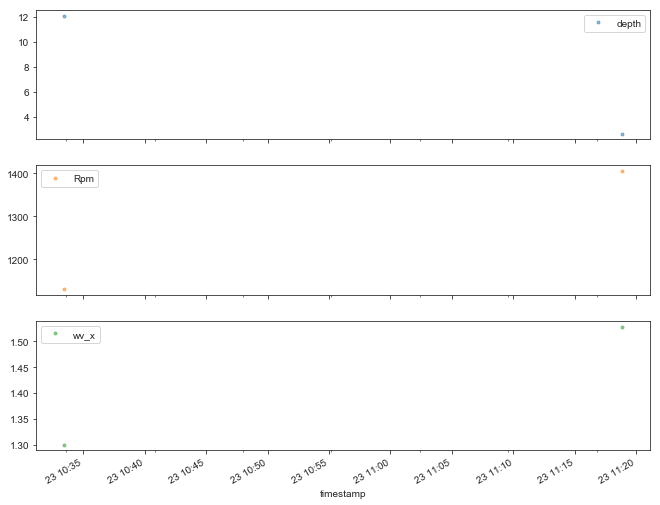

In [22]:
RAWSPEEDBMP = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-23/RawSpeeds03"
# D20200423T103327.892945  -- 1.258843m/s     -- 1337   rpm      -- April mission (1)
# D20200423T111851.909500  -- 1.516541m/s     -- 1337   rpm      -- April mission (2)
# D20200423T131825.448647  -- 1.945775m/s     -- 1330.5 rpm    -- April mission (3)
speed_int = [0,10000]
scenes = ['D20200423T103327.892945', 'D20200423T111851.909500', 'D20200423T131825.448647']
new_stat = stat_comb.loc[sum([stat_comb['export name'].str.contains(f) for f in scenes]) > 0]
print("####### stat_comb ######")
print(stat_comb.loc[sum([stat_comb['export name'].str.contains(f) for f in scenes]) > 0])
print("####### new_stat ######")
print(new_stat.head)
if len(new_stat) > 0:
    #new_stat = new_stat.reset_index()
    #stat.set_index('timestamp', inplace=True)
    #new_stat = new_stat.tz_localize('UTC')
    #new_stat.index = new_stat.index.tz_convert(tz='UTC')
    #new_stat = new_stat.reset_index()
    print(new_stat.columns)
    silc_to_bmp(new_stat['file name'].tolist(), RAWDIR, RAWSPEEDBMP + str(speed_int[0]) + '_' + str(speed_int[1]))
    new_stat[['file name', 'depth', 'Rpm', 'wv_x']].to_csv(RAWSPEEDBMP + str(speed_int[0]) + '_' + str(speed_int[1]) 
                    + '/'
                    + 'RAWSPEEDBMP' + str(speed_int[0]) + '_' + str(speed_int[1]) + '.csv'
                    , index = True, header=True)
    print("####### new_stat again ######")
    print(new_stat[['file name', 'depth', 'Rpm', 'wv_x']])
    cols_plot = ['depth', 'Rpm', 'wv_x']
    new_stat[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

else: 
    print('couldn\'t find images for Rpm between {0} and {1}'.format(str(speed_int[0]), str(speed_int[1])))
    

In [ ]:
RAWSPEEDBMP = "F:/AILARON/Fieldwork/2020-04-AlgaeBloom/lauv-roald/2020-04-23/RawSpeeds"
speed_int = [0, 3000]
new_stat = get_raw_speed(stat_comb, scenes, speed_int, RAWDIR, RAWSPEEDBMP)

if len(new_stat) > 0:
    silc_to_bmp(new_stat['file name'].tolist(), RAWDIR, RAWSPEEDBMP + str(speed_int[0]) + '_' + str(speed_int[1]))
    new_stat.to_csv(RAWSPEEDBMP + str(speed_int[0]) + '_' + str(speed_int[1]) 
                    + '/'
                    + 'RAWSPEEDBMP' + str(speed_int[0]) + '_' + str(speed_int[1]) + '.csv'
                    , index = False, header=True)
else: 
    print('couldn\'t find images for Rpm between {0} and {1}'.format(str(speed_int[0]), str(speed_int[1])))

x_lab_pos 0.5 y_lab_pos 0
999.914 1025.806


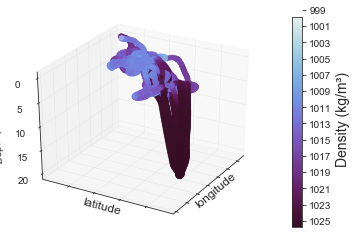

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
mp = ax.scatter3D(df['x'],df['y'],df['depth'], c=df['WaterDensity'], cmap=cmocean.cm.dense) # ,norm = colors.LogNorm()
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.set_xlabel('longitude', fontsize=12, labelpad=-15)
ax.set_ylabel('latitude', fontsize=12, labelpad=-13)
ax.zaxis.set_rotate_label(False) 
x_lab_pos, y_lab_pos = ax.zaxis.label.get_position()
print('x_lab_pos', x_lab_pos, 'y_lab_pos', y_lab_pos)
ax.zaxis._autolabelpos=False
ax.zaxis.label.set_position([x_lab_pos,-10])
#ax.set_zlabel('Depth (meter)', rotation=100, fontsize=12)
#ax.set_zlabel('Depth (meter)', rotation=96, fontsize=10)
ax.set_zlabel('Depth (meter)', rotation=95, fontsize=12)
ax.set_zlabel('Depth (meter)', fontsize=10)
ax.dist = 0
cb = fig.colorbar(mp)

cb.ax.set_ylabel('Density (kg/m\u00b3)', fontsize=14)

print(df['WaterDensity'].min(), df['WaterDensity'].max())
cb.ax.get_yaxis().set_ticks(np.arange(int(df['WaterDensity'].min()), 
                                      int(df['WaterDensity'].max()+1), step=2))
cb.ax.invert_yaxis()
ax.xaxis._axinfo["grid"].update({"linewidth":0.2, "color" : "#D3D3D3"})
ax.yaxis._axinfo["grid"].update({"linewidth":0.2, "color" : "#D3D3D3"})
ax.zaxis._axinfo["grid"].update({"linewidth":0.2, "color" : "#D3D3D3"})
#ax.view_init(75, 269)
#ax.view_init(60, 260)
#ax.view_init(50, 260)
ax.view_init(30, 30)
plt.gca().invert_zaxis() 
plt.show()

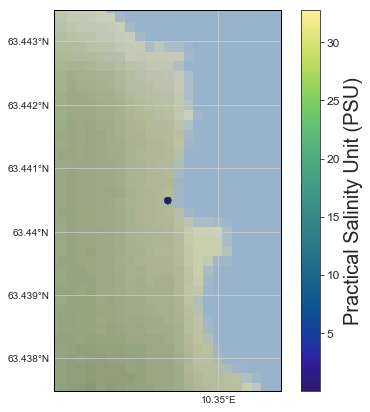

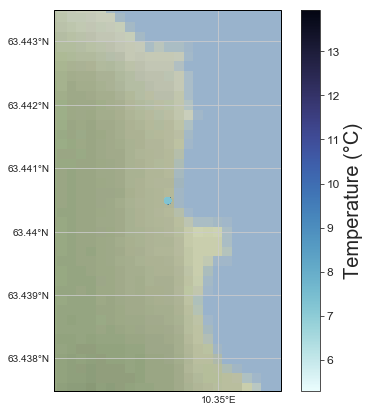

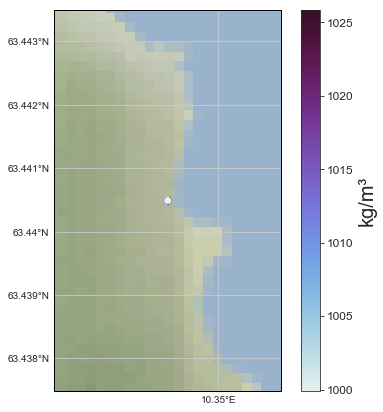

In [12]:
# -*- coding : utf-8 -*-
local_encoding = 'cp850'  # adapt for other encodings
### SALINITY 
fig = plt.figure(figsize=(7,7))
request = cimgt.StamenTerrain()
ax = plt.subplot(111, projection=request.crs)
plt.sca(ax) 
mp = map_plot(df, request, 'Salinity', cmocean.cm.haline)
cb = fig.colorbar(mp)
cb.ax.set_ylabel('Practical Salinity Unit (PSU)', fontsize=20)
plt.show()
fig.savefig(OUTPUTDIR + '/' + 'mapplot_salinity.eps', bbox_inches='tight')

### TEMPERATURE
fig = plt.figure(figsize=(7,7))
request = cimgt.StamenTerrain()
ax = plt.subplot(111, projection=request.crs)
plt.sca(ax)
mp = map_plot(df, request, 'Temperature', cmocean.cm.ice_r)
cb = fig.colorbar(mp)
cb.ax.set_ylabel('Temperature (\xb0C)', fontsize=20)
plt.show()
fig.savefig(OUTPUTDIR + '/' + 'mapplot_temperature.eps', bbox_inches='tight')

### DENSITY
fig = plt.figure(figsize=(7,7))
request = cimgt.StamenTerrain()
ax = plt.subplot(111, projection=request.crs)
plt.sca(ax) 
mp = map_plot(df, request, 'WaterDensity', cmocean.cm.dense)
cb = fig.colorbar(mp)
cb.ax.set_ylabel('kg/m\u00b3', fontsize=20)
plt.show()
fig.savefig(OUTPUTDIR + '/' + 'mapplot_density.eps', bbox_inches='tight')

                                     Salinity  depth  Rpm  wv_x
timestamp                                                      
2020-04-21 13:02:55.956000090+00:00       NaN  0.130    0   NaN
2020-04-21 13:02:56.956000090+00:00       NaN  0.127    0   NaN
2020-04-21 13:02:57.956000090+00:00       NaN  0.128    0   NaN
2020-04-21 13:02:58.956000090+00:00       NaN  0.124    0   NaN
2020-04-21 13:02:59.956000090+00:00       NaN  0.126    0   NaN


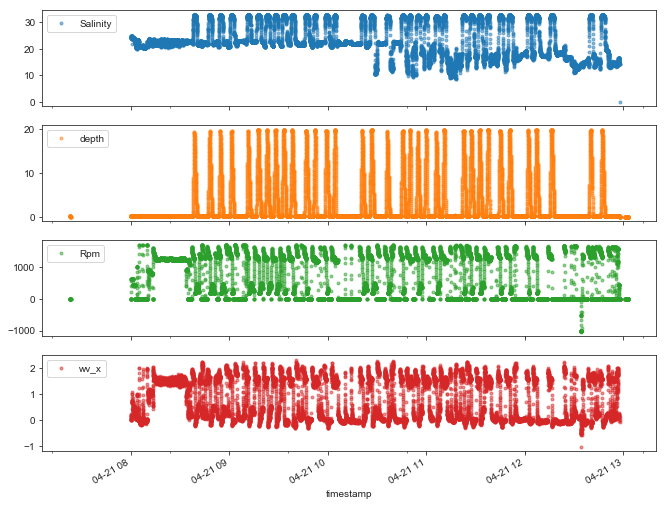

In [10]:
cols_plot = ['Salinity','depth', 'Rpm', 'wv_x']
df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
print(df[['Salinity','depth', 'Rpm', 'wv_x']].tail())